In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year = 2018
names = ['Date', 'TempAvg', 'TempMin', 'TempMax', 'Rain', 'Snow', 'WindDir', 'WindSpeed', 'WindSpeedMax', 'Pressure', 'Sunshine']

In [263]:
def analize(df):
  print(df.head())
  print(df.describe())
  print(df.head(10))
  print(df.dtypes)
  print(df.shape)

def cleanup(df):
  print(df.isna().sum())
  
  df.dropna(thresh=int(len(df) * 0.2), axis=1, inplace=True)
  
  print(df.isna().sum())
  print(df.shape)

  df_NoNaN = df.dropna(how='any')

  print(df_NoNaN.isna().sum())
  print(df_NoNaN.shape)

  return df_NoNaN

def plot_NoNaN(df_NoNaN):
  cityName = df_NoNaN['City'].iloc[0]

  plt.figure(figsize=(10, 6))
  plt.title(f'{cityName} - Temperature in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df_NoNaN, x='Date', y='TempAvg', label='TempAvg')
  sns.lineplot(data=df_NoNaN, x='Date', y='TempMin', label='TempMin')
  sns.lineplot(data=df_NoNaN, x='Date', y='TempMax', label='TempMax')
  plt.legend()
  plt.show()

  if 'Pressure' in df_NoNaN:
    plt.figure(figsize=(10, 6))
    plt.title(f'{cityName} - Pressure in {year}')
    plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
    sns.lineplot(data=df_NoNaN, x='Date', y='Pressure')
    plt.show()
  else:
    print('No Pressure data')
  
  if 'WindSpeed' in df_NoNaN or 'WindSpeedMax' in df_NoNaN:
    plt.figure(figsize=(10, 6))
    plt.title(f'{cityName} - Wind Speed in {year}')
    plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))

    if 'WindSpeed' in df_NoNaN:
      sns.lineplot(data=df_NoNaN, x='Date', y='WindSpeed', label='Wind Speed')
    
    if 'WindSpeedMax' in df_NoNaN:
      sns.lineplot(data=df_NoNaN, x='Date', y='WindSpeedMax', label='Max Wind Speed')
    plt.legend()
    plt.show()
  else:
    print('No Wind Speed data')

  if 'Rain' in df_NoNaN:
    plt.figure(figsize=(10, 6))
    plt.title(f'{cityName} - Rain in {year}')
    plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
    sns.lineplot(data=df_NoNaN, x='Date', y='Rain')
    plt.show()
  else:
    print('No Rain data')

  if 'WindDir' in df_NoNaN:
    plt.figure(figsize=(8, 8))
    plt.title(f'{cityName} - Wind Direction in {year}')
    sns.histplot(data=df_NoNaN, x='WindDir', stat='count', bins=16, multiple='stack')
    plt.xticks(np.arange(0, 360, 22.5), labels=['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])
    plt.show()
  else:
    print('No Wind Direction data')

def interpolate(df):
  def interpolate_column(df, column_name):
    col = df[column_name].values  # Użyj .values, aby uzyskać wartości jako numpy array
    n = len(col)
    # Zidentyfikowanie NaN w kolumnie
    nan_indices = np.where(np.isnan(col))[0]
    if len(nan_indices) == 0:
        return col

    # Przejście przez wszystkie NaN i interpolowanie wartości
    for nan_index in nan_indices:
        # Znalezienie poprzednich i następnych wartości
        prev_index = nan_index - 1
        next_index = nan_index + 1

        # Szukanie poprzedniej nie-NaN wartości
        while prev_index >= 0 and np.isnan(col[prev_index]):
            prev_index -= 1

        # Szukanie następnej nie-NaN wartości
        while next_index < n and np.isnan(col[next_index]):
            next_index += 1

        # Interpolacja liniowa
        if prev_index >= 0 and next_index < n:
            col[nan_index] = col[prev_index] + (col[next_index] - col[prev_index]) * (nan_index - prev_index) / (next_index - prev_index)
        elif prev_index >= 0:
            col[nan_index] = col[prev_index]
        elif next_index < n:
            col[nan_index] = col[next_index]

    return col

  # Zastosowanie funkcji do wszystkich kolumn zawierających NaN
  for column in df.columns:
      if df[column].isna().sum() > 0:
          df[column] = interpolate_column(df, column)

  print(df.isna().sum())

def plot(df, df_NoNaN, df_WithNaN):
  cityName = df_NoNaN['City'].iloc[0]

  plt.figure(figsize=(10, 6))
  plt.title(f'{cityName} - Temperature in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df, x='Date', y='TempAvg', label='TempAvg')
  sns.lineplot(data=df, x='Date', y='TempMin', label='TempMin')
  sns.lineplot(data=df, x='Date', y='TempMax', label='TempMax')
  plt.legend()
  plt.show()

  plt.figure(figsize=(10, 6))
  plt.title(f'{cityName} - Wind Speed in {year}')
  plt.xlim(pd.Timestamp(f'{year}-01-01'), pd.Timestamp(f'{year}-12-31'))
  sns.lineplot(data=df, x='Date', y='WindSpeed', label='Wind Speed')
  sns.lineplot(data=df, x='Date', y='WindSpeedMax', label='Max Wind Speed')
  plt.legend()
  plt.show()

  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

  fig.suptitle(f'{cityName} - Wind Direction in {year}')

  # Plot for df_NoNaN
  ax1.set_title('df_NoNaN')
  sns.histplot(data=df_NoNaN, x='WindDir', stat='count', bins=16, multiple='stack', ax=ax1)
  ax1.set_xticks(np.arange(0, 360, 22.5))
  ax1.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])

  # Plot for df
  ax2.set_title('df')
  sns.histplot(data=df, x='WindDir', stat='count', bins=16, multiple='stack', ax=ax2)
  ax2.set_xticks(np.arange(0, 360, 22.5))
  ax2.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])

  # Plot for df_withNaN
  ax3.set_title('df_withNaN')
  sns.histplot(data=df_WithNaN, x='WindDir', stat='count', bins=16, multiple='stack', ax=ax3)
  ax3.set_xticks(np.arange(0, 360, 22.5))
  ax3.set_xticklabels(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'])

  plt.show()

In [264]:
def read_csv(filename, city_name):
  df = pd.read_csv(filename, delimiter=',', names=names, skiprows=1)  # skipping header row
  df['Date'] = pd.to_datetime(df['Date'])
  df = df[df['Date'].dt.year == year]
  df['City'] = city_name
  return df

In [265]:


# Load the data for multiple cities
df_Krakow = read_csv('Krakow.csv',    'Krakow')
df_Warsaw = read_csv('Warszawa.csv',  'Warszawa')
df_Szczec = read_csv('Szczecin.csv',  'Szczecin')
df_Gdansk = read_csv('Gdansk.csv',    'Gdansk')
df_Podlas = read_csv('Bialystok.csv', 'Bialystok')
df_Malmo = read_csv('Malmo.csv', 'Malmo')
df_Monachium = read_csv('Monachium.csv', 'Monachium')
df_Czerniowce = read_csv('Czerniowce.csv', 'Czerniowce')
df_Ryga = read_csv('Ryga.csv', 'Ryga')

city_coords = {
  'Krakow':    (19.94, 50.06),
  'Warszawa':  (21.01, 52.23),
  'Szczecin':  (14.55, 53.43),
  'Gdansk':    (18.65, 54.35),
  'Bialystok': (23.16, 53.13),
  'Malmo':     (13.00, 55.61),
  'Monachium': (11.58, 48.14),
  'Czerniowce':(25.94, 48.29),
  'Ryga':      (24.10, 56.95),
}

def run(df):
  df_WithNaN = pd.DataFrame(df)
  analize(df)
  df_NoNaN = cleanup(df)
  plot_NoNaN(df_NoNaN)
  interpolate(df)
  plot(df, df_NoNaN, df_WithNaN)


            Date  TempAvg  TempMin  TempMax  Rain  Snow  WindDir  WindSpeed  \
15969 2018-01-01      2.9     -0.8      6.3   0.0   NaN    249.0        5.9   
15970 2018-01-02      1.1     -4.6      4.7   0.0   NaN    283.0        8.5   
15971 2018-01-03      2.3     -3.0      5.6   0.0   NaN    206.0       12.8   
15972 2018-01-04      4.4      0.6      7.4   3.3   NaN    219.0       14.7   
15973 2018-01-05      4.8      0.2      9.4   0.0   NaN    249.0        8.4   

       WindSpeedMax  Pressure  Sunshine    City  
15969           NaN    1008.5       NaN  Krakow  
15970           NaN    1009.5       NaN  Krakow  
15971           NaN    1002.9       NaN  Krakow  
15972           NaN    1001.4       NaN  Krakow  
15973           NaN    1002.7       NaN  Krakow  
                      Date     TempAvg     TempMin     TempMax        Rain  \
count                  365  365.000000  365.000000  365.000000  363.000000   
mean   2018-07-02 00:00:00   10.105753    5.406575   15.236438    1.5

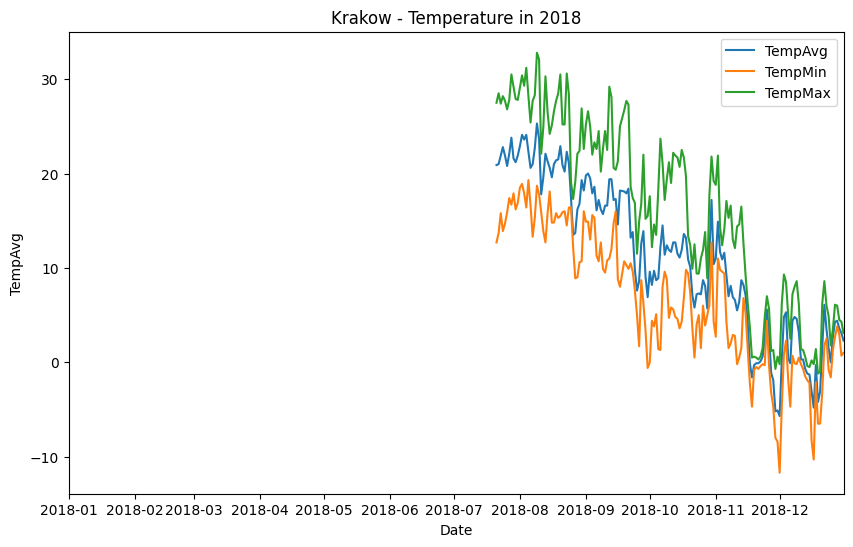

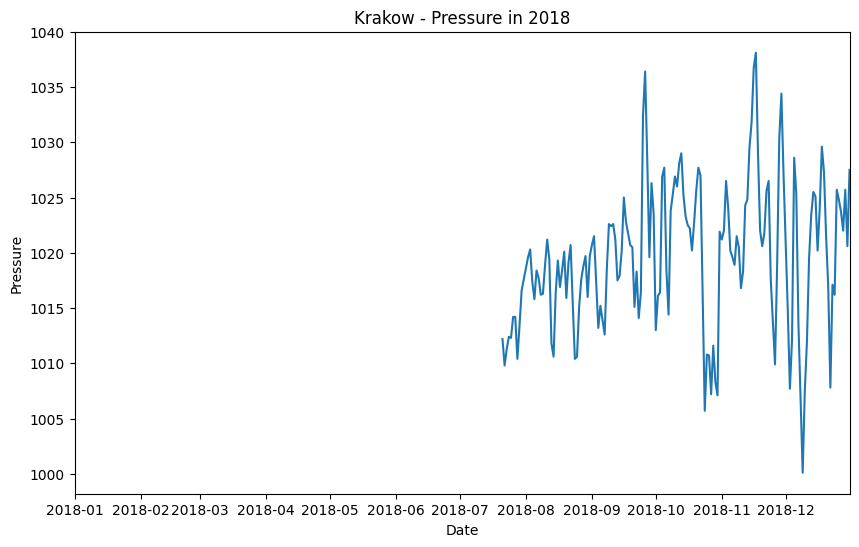

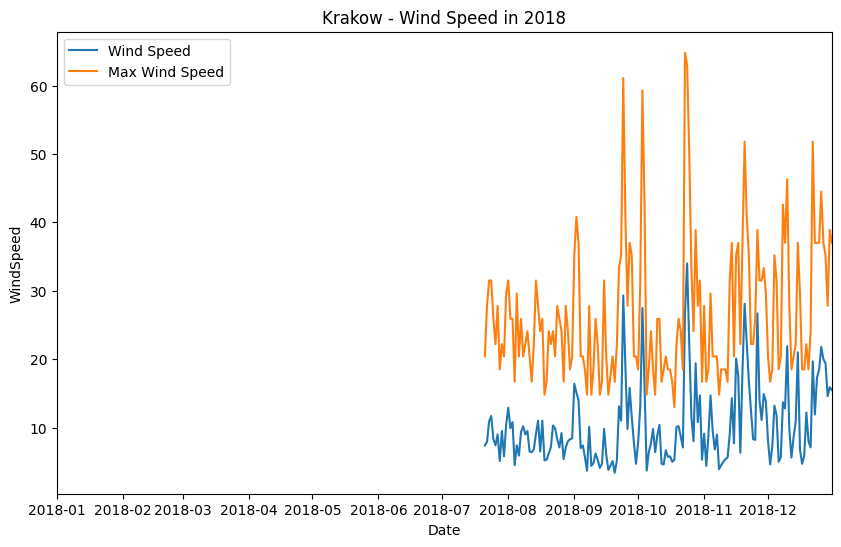

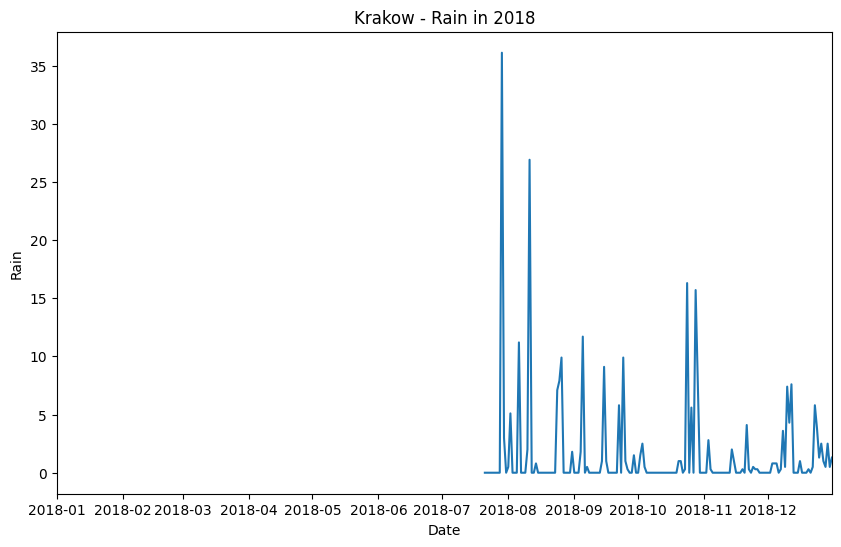

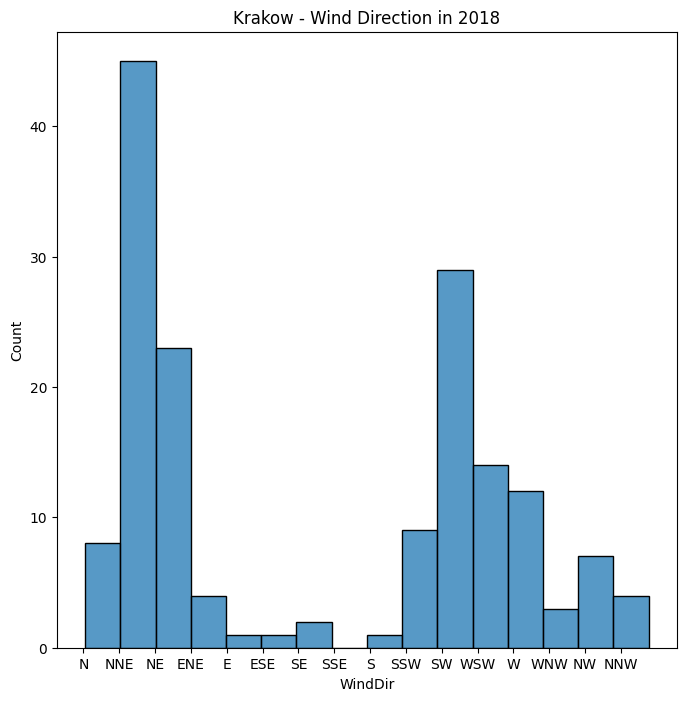

Date            0
TempAvg         0
TempMin         0
TempMax         0
Rain            0
WindDir         0
WindSpeed       0
WindSpeedMax    0
Pressure        0
City            0
dtype: int64


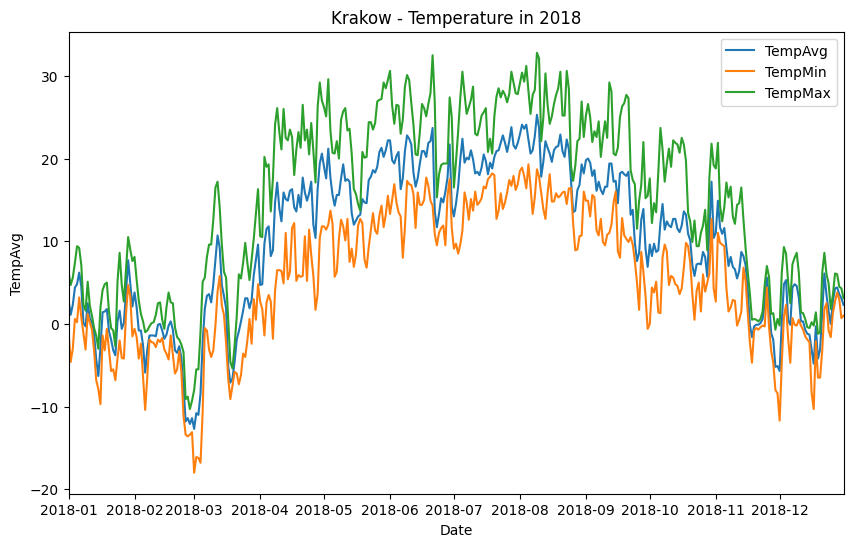

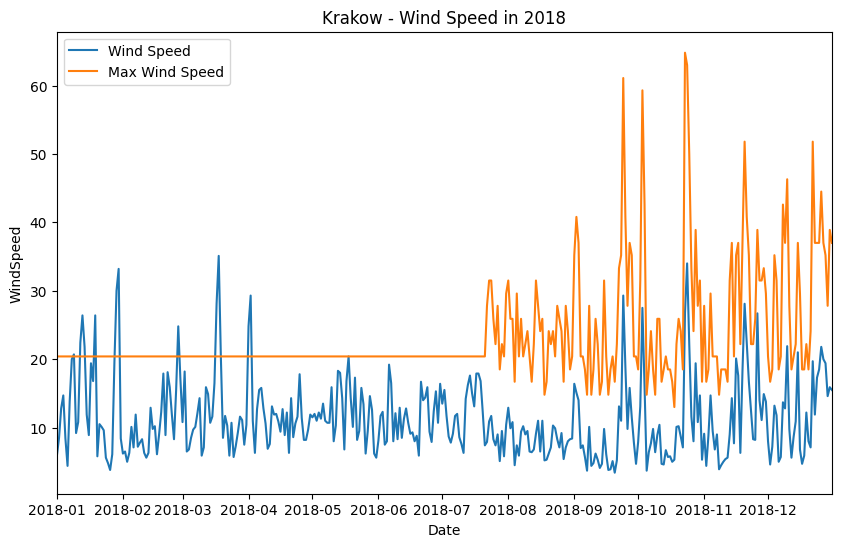

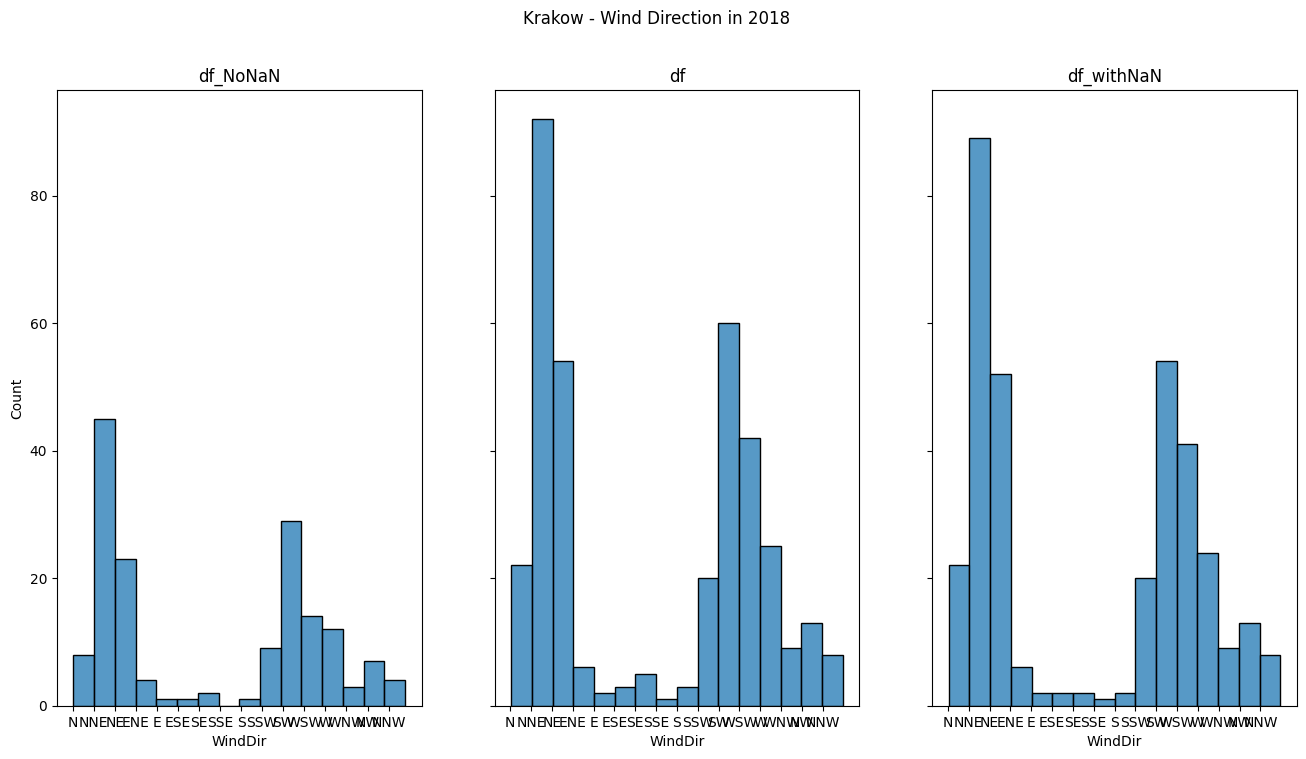

In [266]:
run(df_Krakow)

            Date  TempAvg  TempMin  TempMax  Rain  Snow  WindDir  WindSpeed  \
20440 2018-01-01      7.6      2.8      9.5   0.0   NaN    190.0        7.7   
20441 2018-01-02      1.3     -0.5      6.9   0.0   NaN    147.0        8.0   
20442 2018-01-03      3.5      2.0      5.3   0.0   NaN    183.0       13.4   
20443 2018-01-04      5.8      2.1      8.0   2.3   NaN    196.0       11.1   
20444 2018-01-05      6.4      3.3      8.8   0.3   NaN    191.0       11.1   

       WindSpeedMax  Pressure  Sunshine      City  
20440           NaN    1004.5       NaN  Warszawa  
20441           NaN    1007.7       NaN  Warszawa  
20442           NaN    1000.3       NaN  Warszawa  
20443           NaN     996.9       NaN  Warszawa  
20444           NaN     998.8       NaN  Warszawa  
                      Date     TempAvg     TempMin     TempMax        Rain  \
count                  365  365.000000  365.000000  365.000000  364.000000   
mean   2018-07-02 00:00:00   10.690959    6.228493   14.8

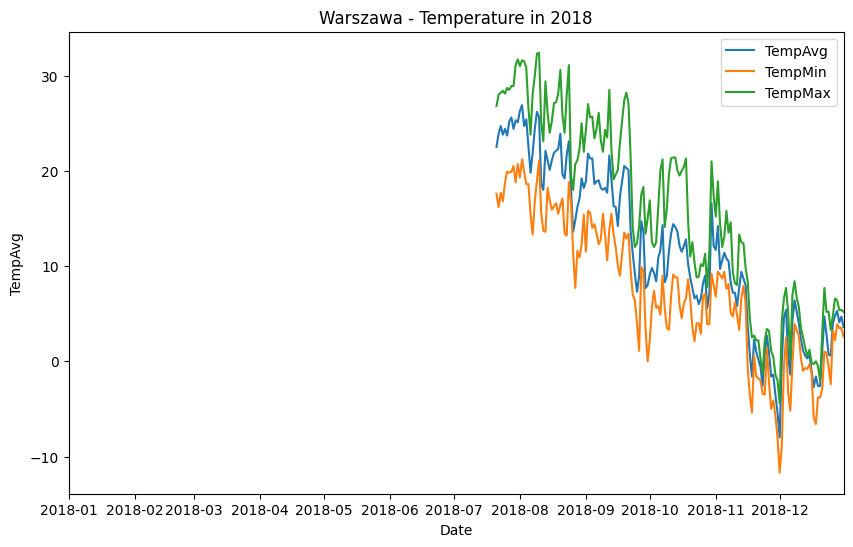

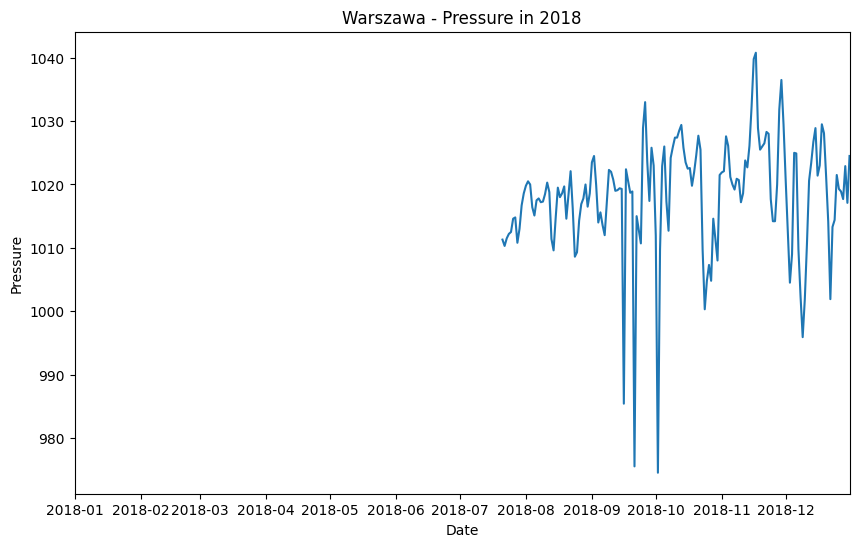

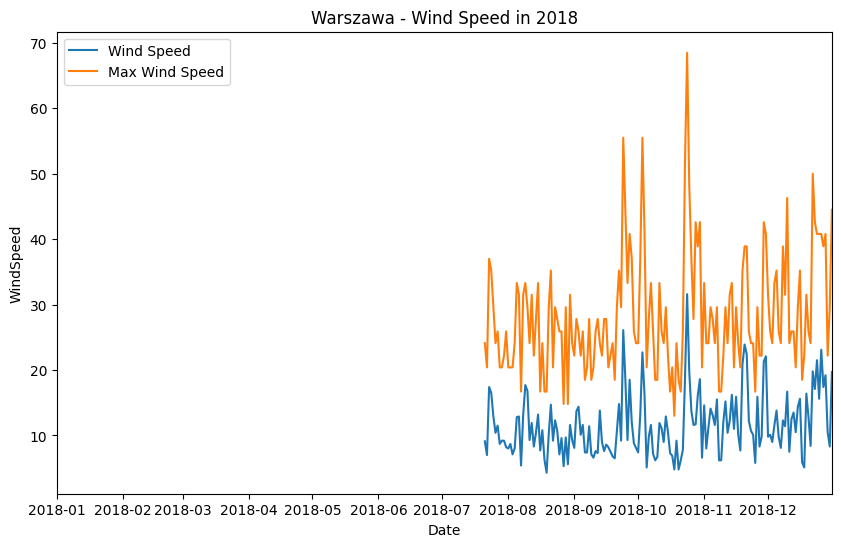

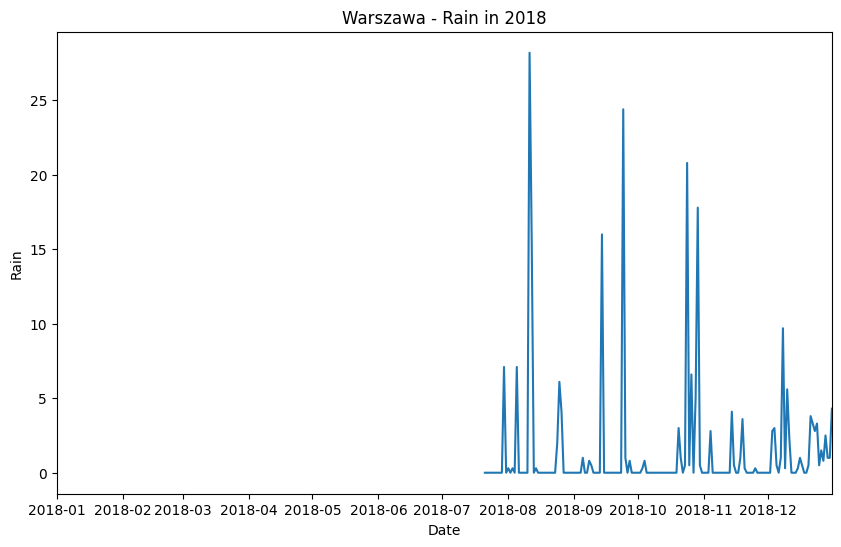

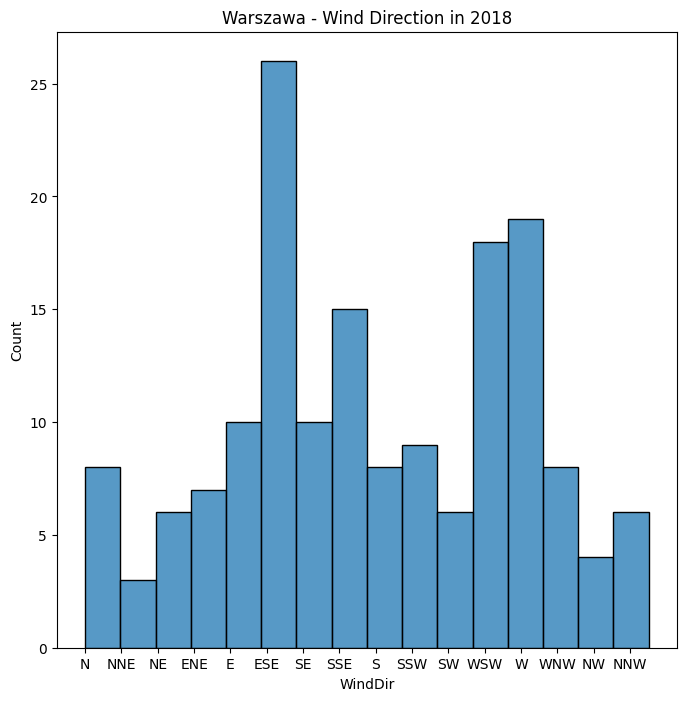

Date            0
TempAvg         0
TempMin         0
TempMax         0
Rain            0
WindDir         0
WindSpeed       0
WindSpeedMax    0
Pressure        0
City            0
dtype: int64


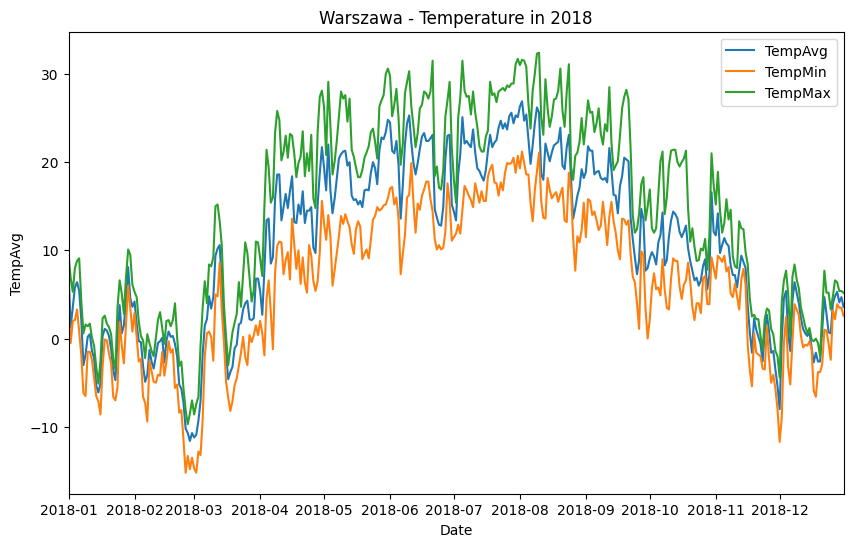

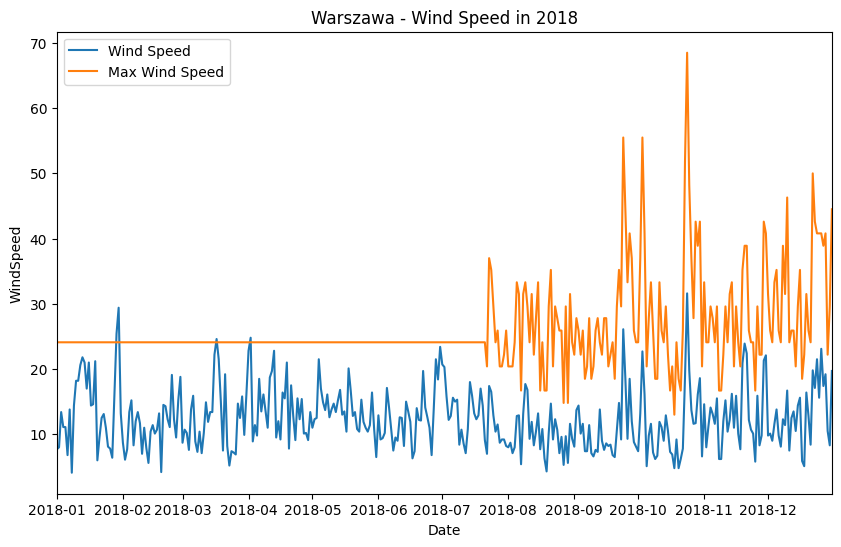

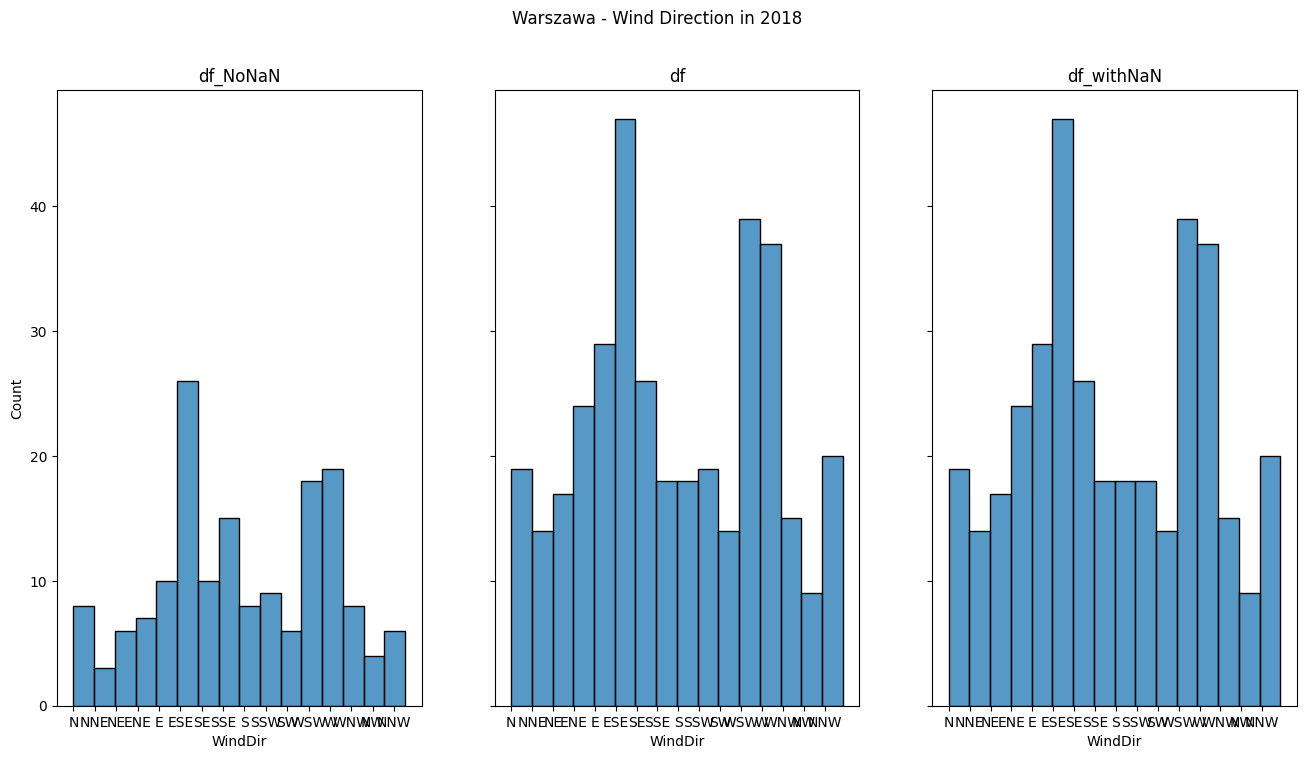

In [267]:
run(df_Warsaw)

            Date  TempAvg  TempMin  TempMax  Rain  Snow  WindDir  WindSpeed  \
24238 2018-01-01      7.6      2.0     11.7   1.8   NaN    203.0       15.9   
24239 2018-01-02      3.1      2.0      5.4   1.0   NaN      NaN        7.1   
24240 2018-01-03      3.2      1.0      5.9   4.3   NaN    162.0       22.1   
24241 2018-01-04      4.9      4.0      6.1  16.8   NaN    223.0       16.1   
24242 2018-01-05      6.0      4.0      8.1   2.5   NaN    222.0       17.6   

       WindSpeedMax  Pressure  Sunshine      City  
24238           NaN     998.1       NaN  Szczecin  
24239           NaN    1004.3       NaN  Szczecin  
24240           NaN       NaN       NaN  Szczecin  
24241           NaN     989.4       NaN  Szczecin  
24242           NaN     992.5       NaN  Szczecin  
                      Date     TempAvg     TempMin     TempMax        Rain  \
count                  365  365.000000  334.000000  356.000000  364.000000   
mean   2018-07-02 00:00:00   10.143288    5.622754   15.4

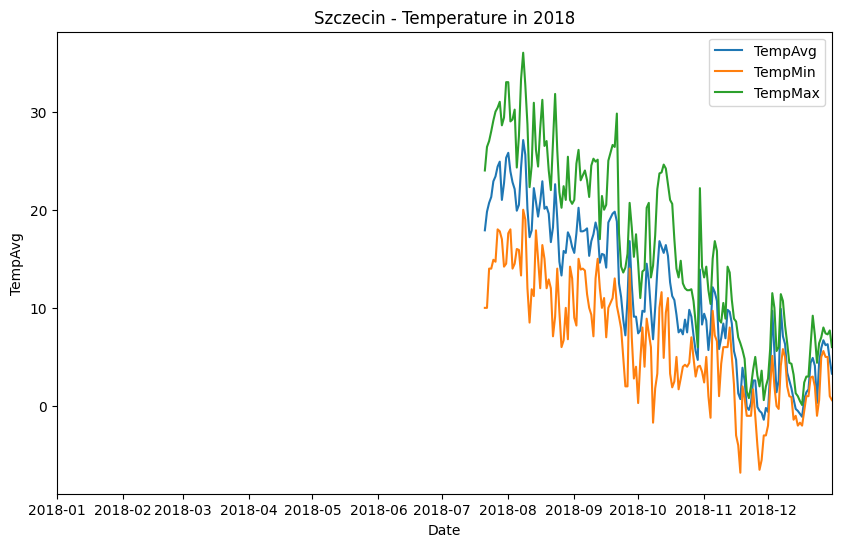

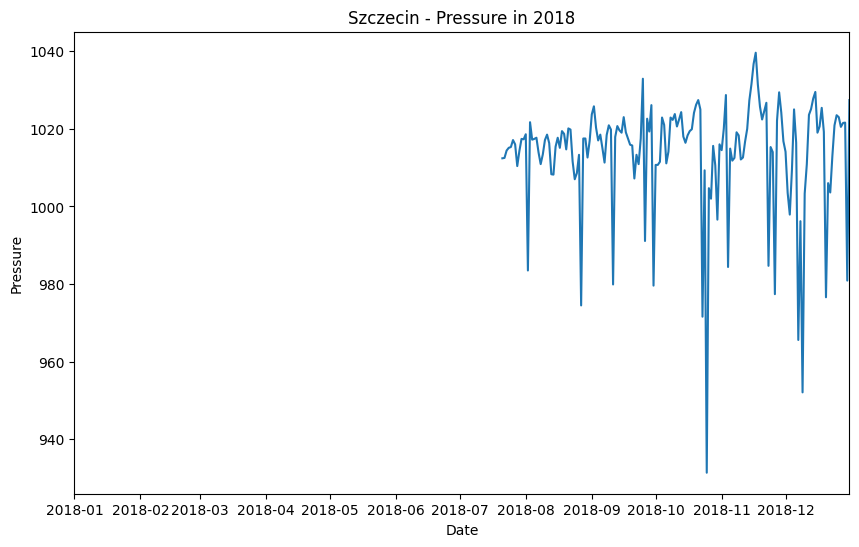

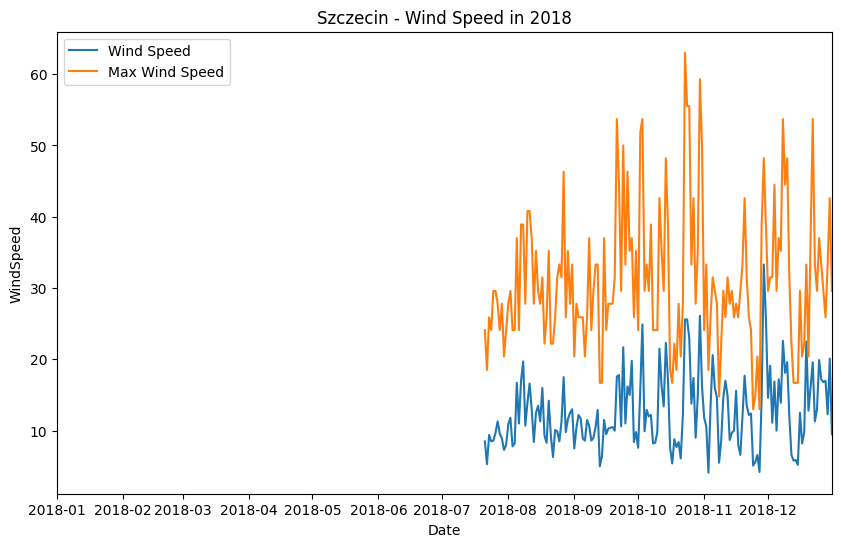

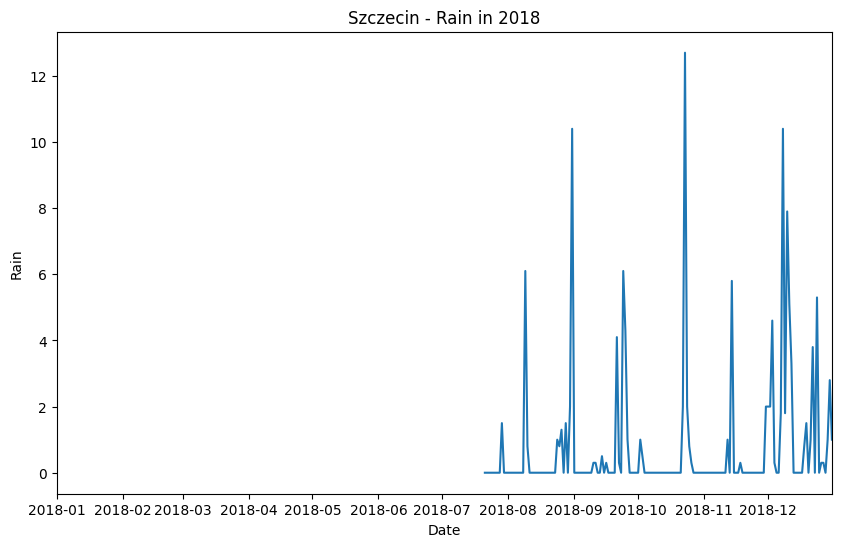

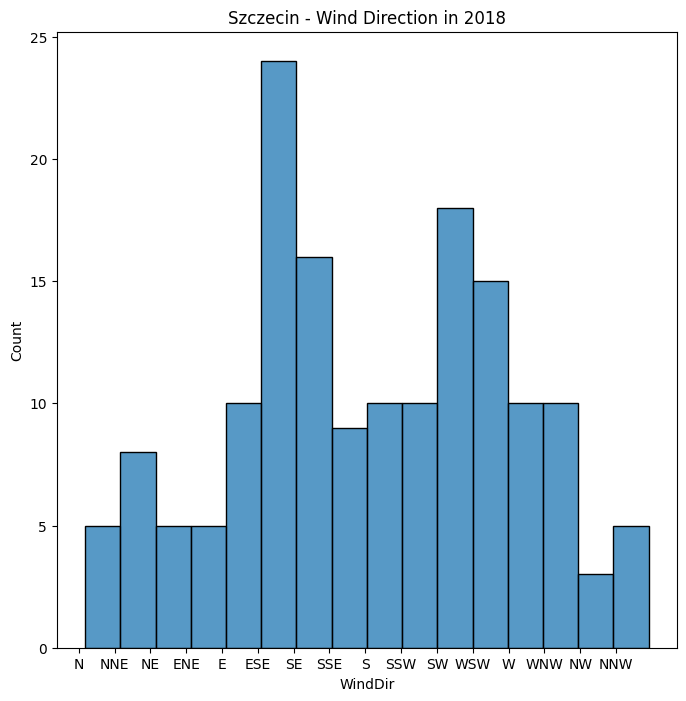

Date            0
TempAvg         0
TempMin         0
TempMax         0
Rain            0
WindDir         0
WindSpeed       0
WindSpeedMax    0
Pressure        0
City            0
dtype: int64


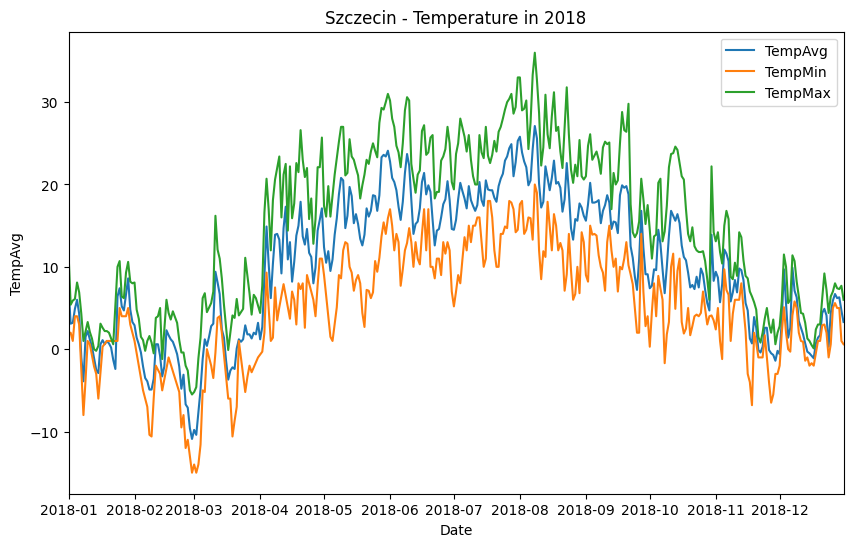

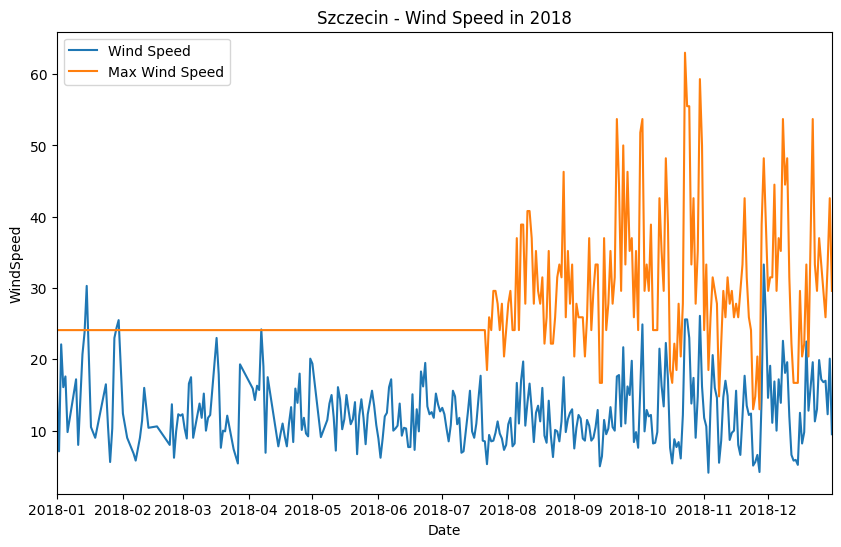

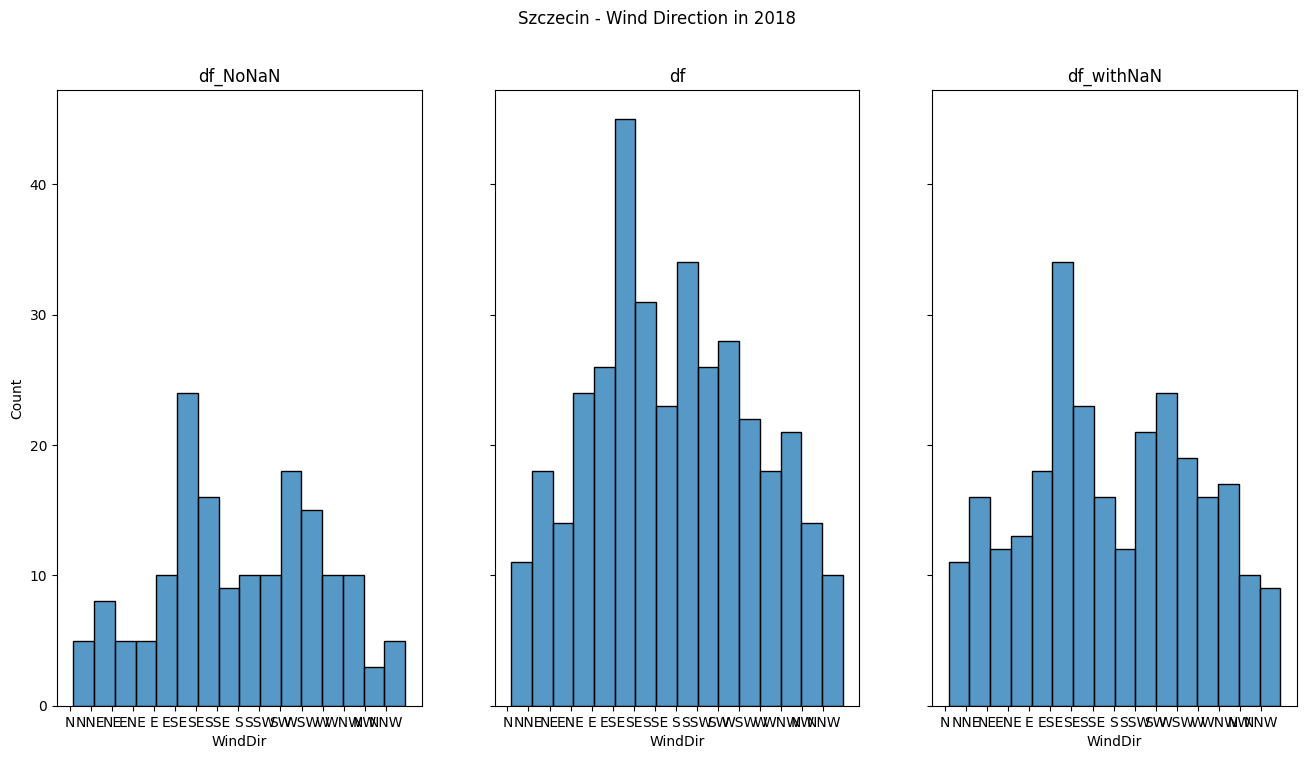

In [268]:
run(df_Szczec)

           Date  TempAvg  TempMin  TempMax  Rain  Snow  WindDir  WindSpeed  \
8983 2018-01-01      7.0      3.0      9.0   NaN   NaN    220.0       21.8   
8984 2018-01-02      1.9      0.0      4.0   NaN   NaN    216.0        7.7   
8985 2018-01-03      1.9      0.0      3.0   NaN   NaN    171.0       20.0   
8986 2018-01-04      3.6      2.0      5.0   NaN   NaN    206.0       19.8   
8987 2018-01-05      4.5      3.0      6.0   NaN   NaN    212.0       22.3   

      WindSpeedMax  Pressure  Sunshine    City  
8983           NaN     997.4       NaN  Gdansk  
8984           NaN       NaN       NaN  Gdansk  
8985           NaN     953.5       NaN  Gdansk  
8986           NaN     987.9       NaN  Gdansk  
8987           NaN       NaN       NaN  Gdansk  
                      Date     TempAvg     TempMin     TempMax  Rain  Snow  \
count                  365  365.000000  365.000000  365.000000   0.0   0.0   
mean   2018-07-02 00:00:00    8.943014    5.095890   12.723288   NaN   NaN   
min

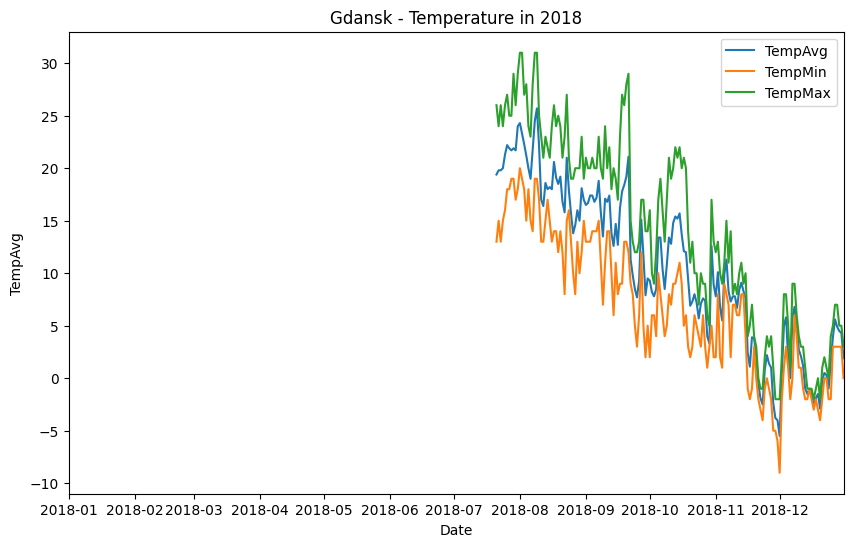

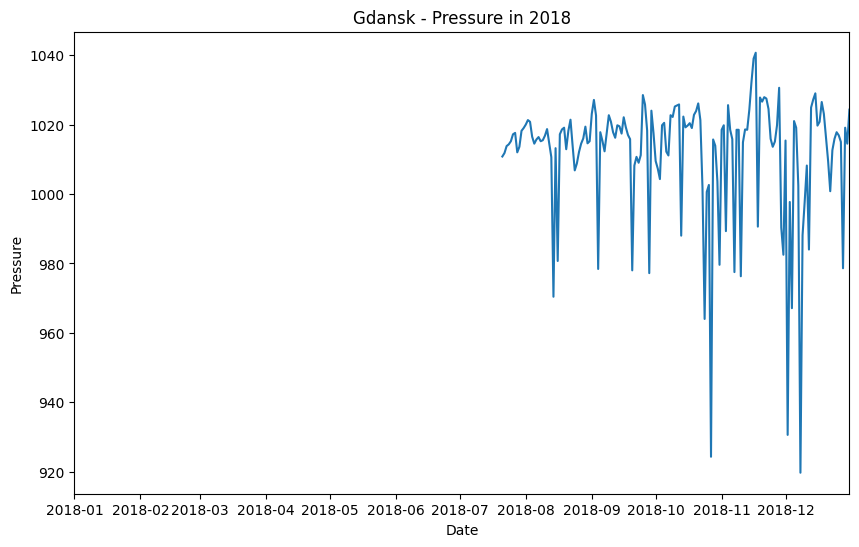

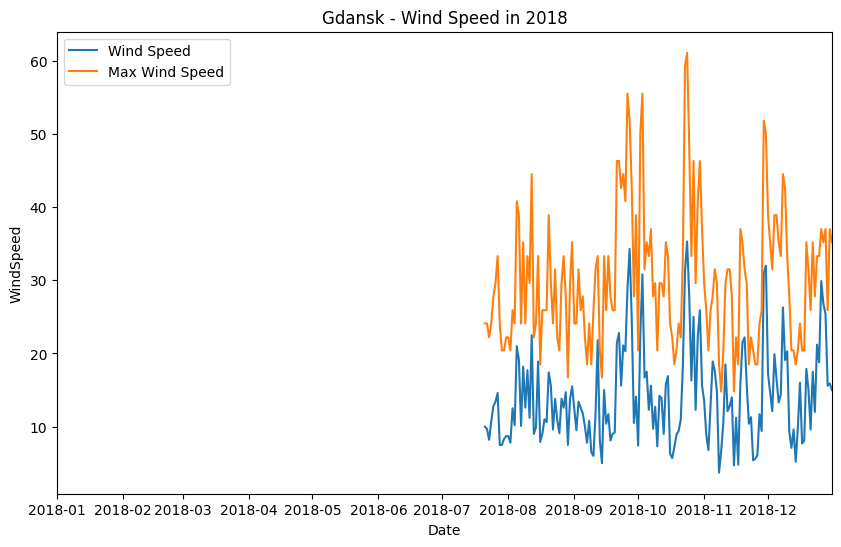

No Rain data


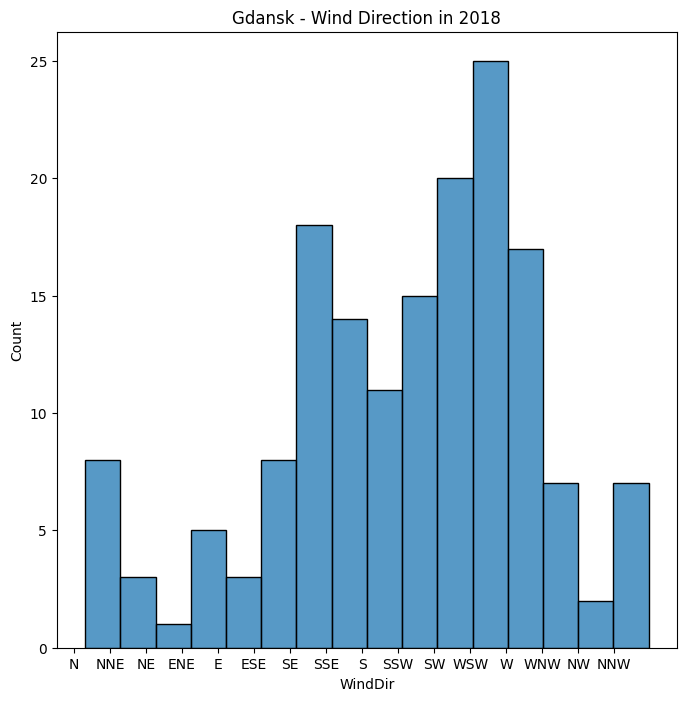

Date            0
TempAvg         0
TempMin         0
TempMax         0
WindDir         0
WindSpeed       0
WindSpeedMax    0
Pressure        0
City            0
dtype: int64


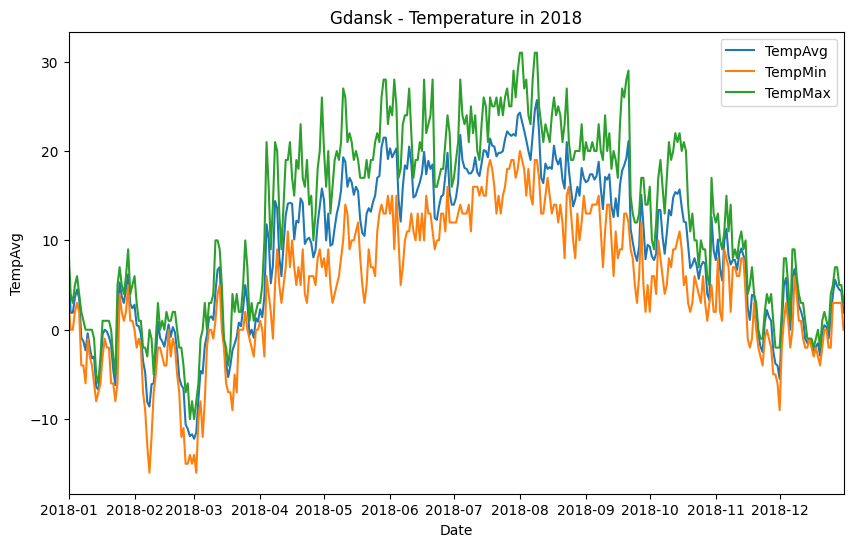

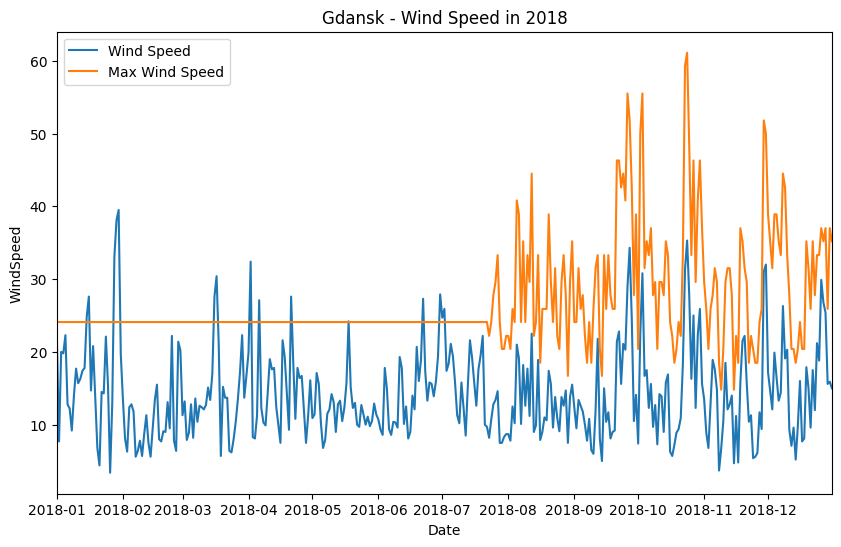

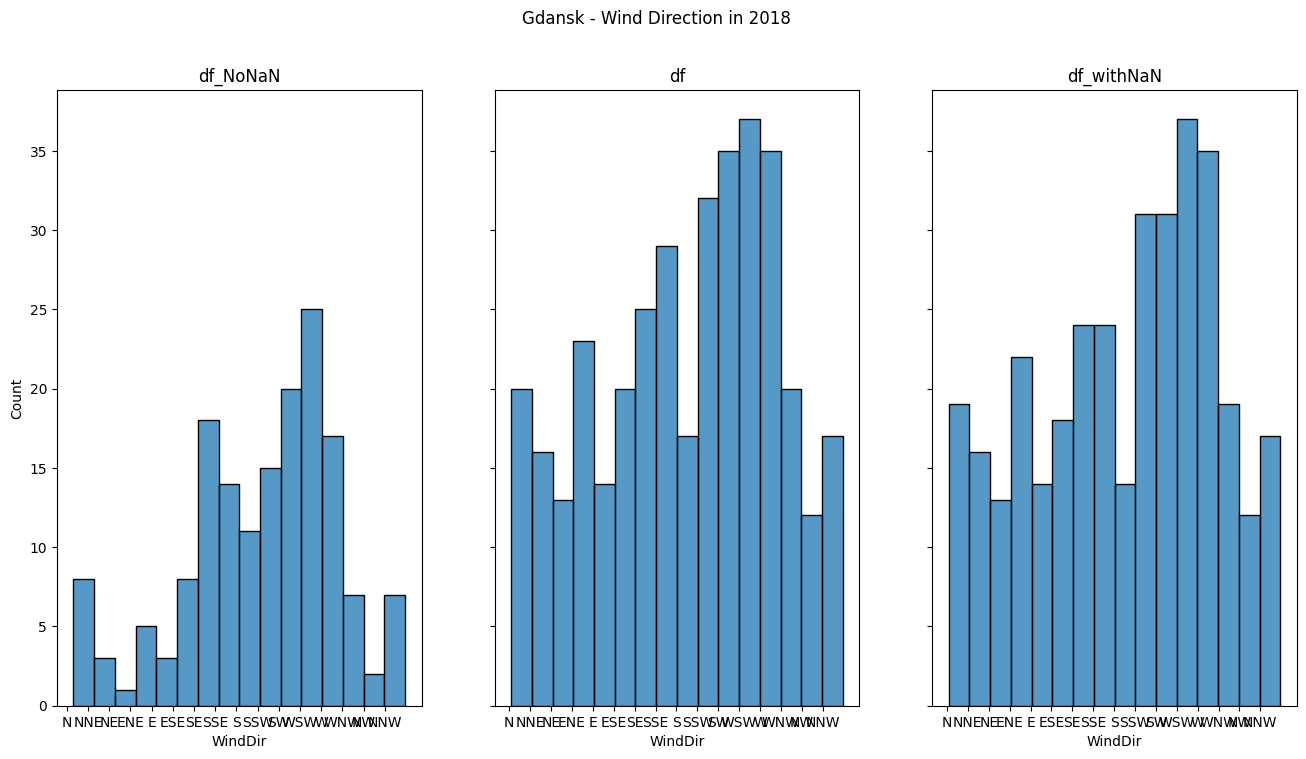

In [269]:
run(df_Gdansk)

            Date  TempAvg  TempMin  TempMax  Rain  Snow  WindDir  WindSpeed  \
20340 2018-01-01      5.4      0.8      6.8   1.0   NaN    199.0       10.7   
20341 2018-01-02      1.6     -0.7      6.2   0.5   NaN    159.0        6.9   
20342 2018-01-03      2.1      1.0      3.1   0.0   NaN    173.0        8.6   
20343 2018-01-04      3.9      1.2      5.7   0.5   NaN    189.0       10.5   
20344 2018-01-05      3.8      1.5      5.9   0.3   NaN    188.0       11.9   

       WindSpeedMax  Pressure  Sunshine       City  
20340           NaN    1004.0       NaN  Bialystok  
20341           NaN    1008.5       NaN  Bialystok  
20342           NaN    1001.7       NaN  Bialystok  
20343           NaN     997.1       NaN  Bialystok  
20344           NaN     999.2       NaN  Bialystok  
                      Date     TempAvg     TempMin     TempMax        Rain  \
count                  365  365.000000  364.000000  365.000000  362.000000   
mean   2018-07-02 00:00:00    8.762740    3.894231 

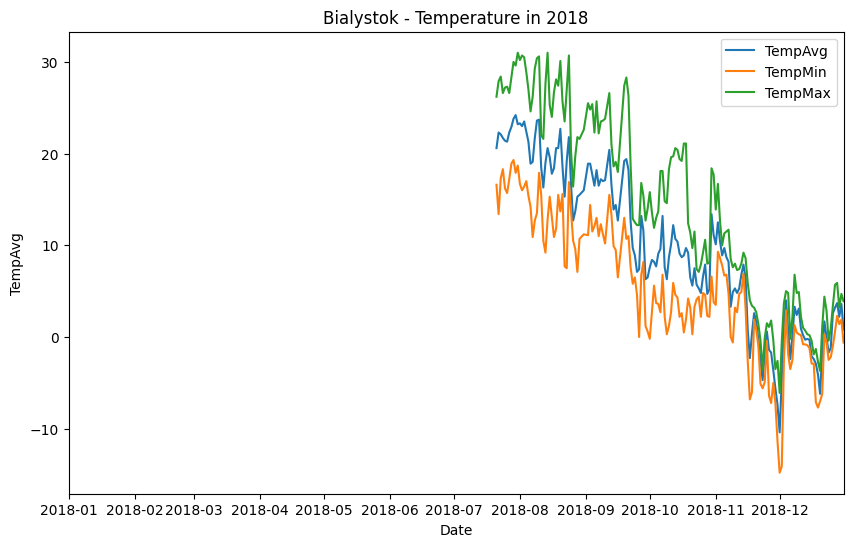

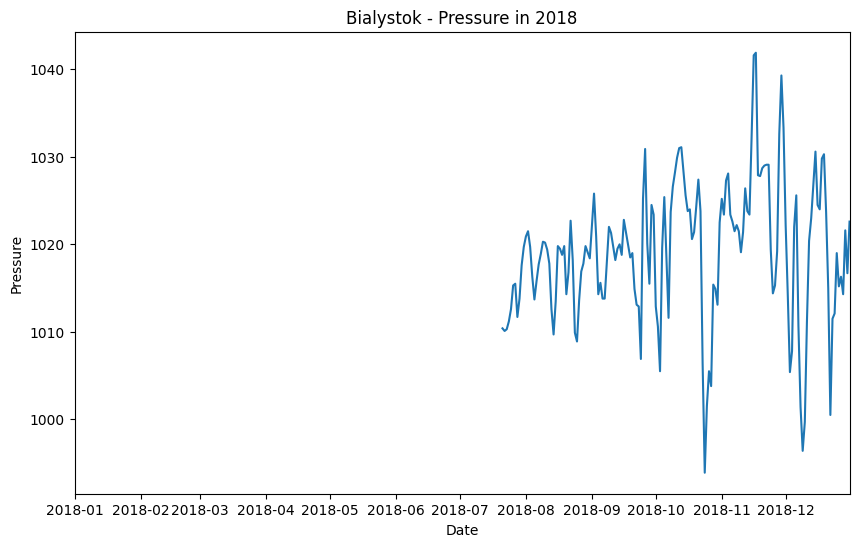

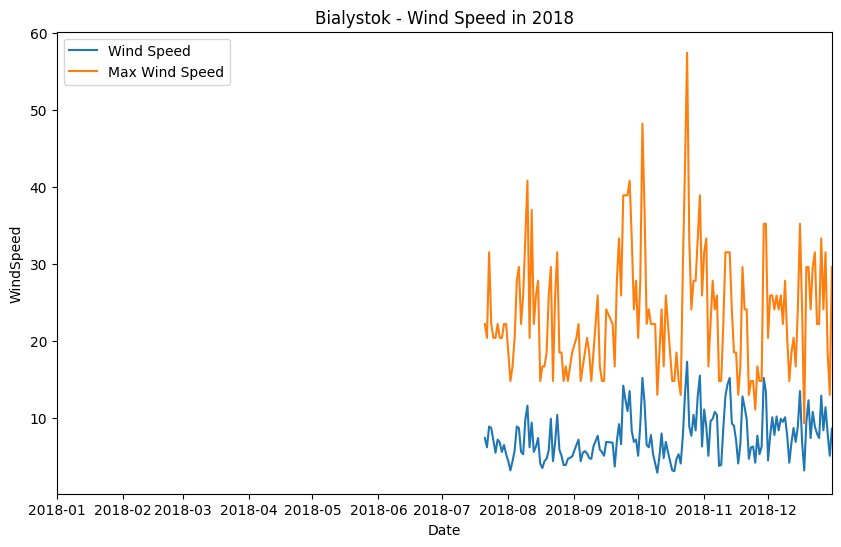

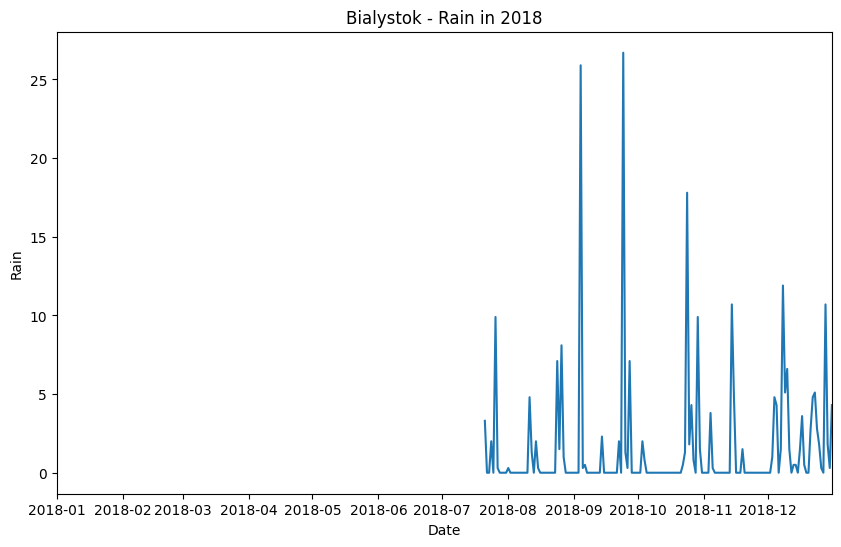

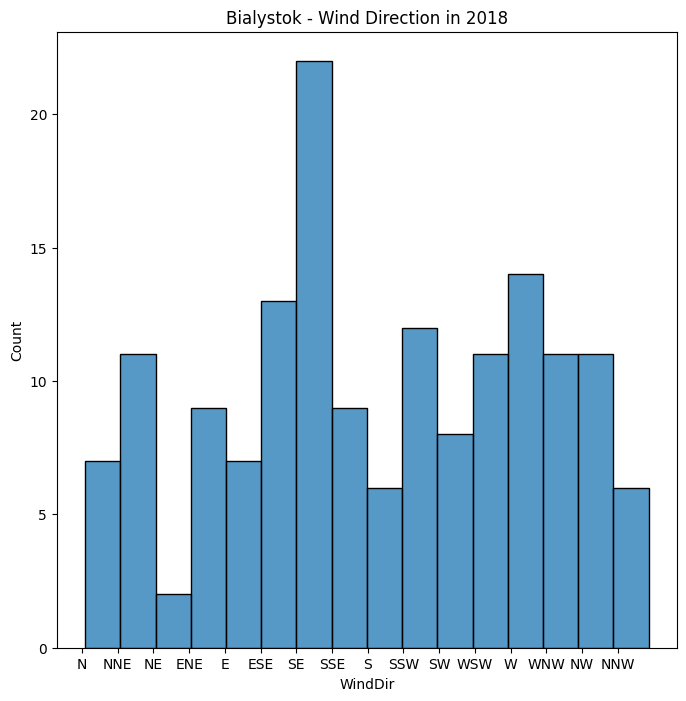

Date            0
TempAvg         0
TempMin         0
TempMax         0
Rain            0
WindDir         0
WindSpeed       0
WindSpeedMax    0
Pressure        0
City            0
dtype: int64


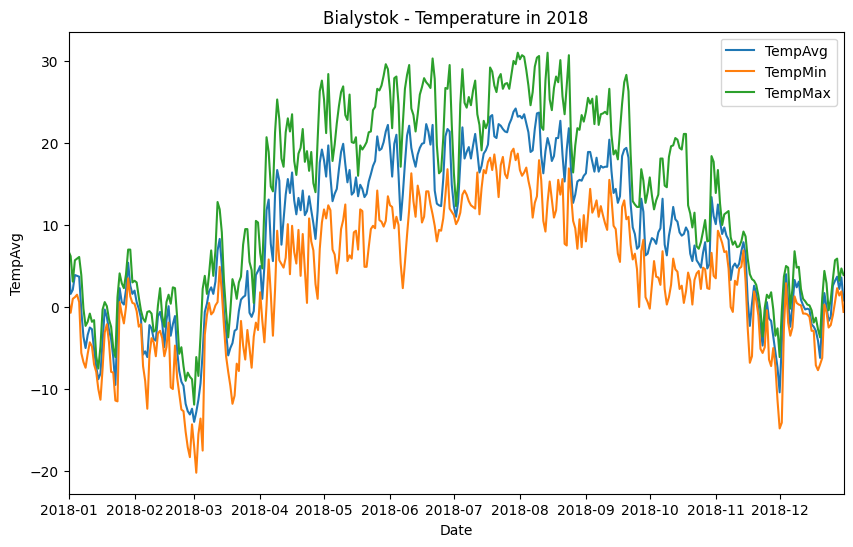

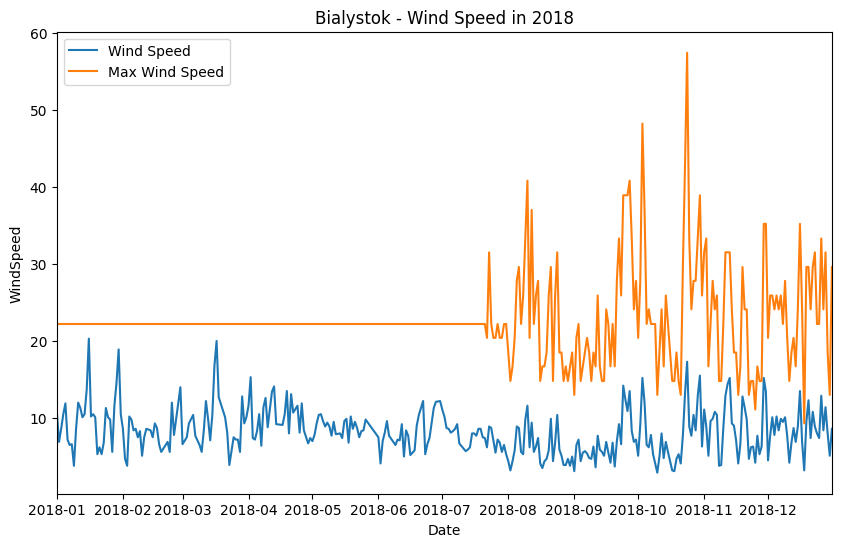

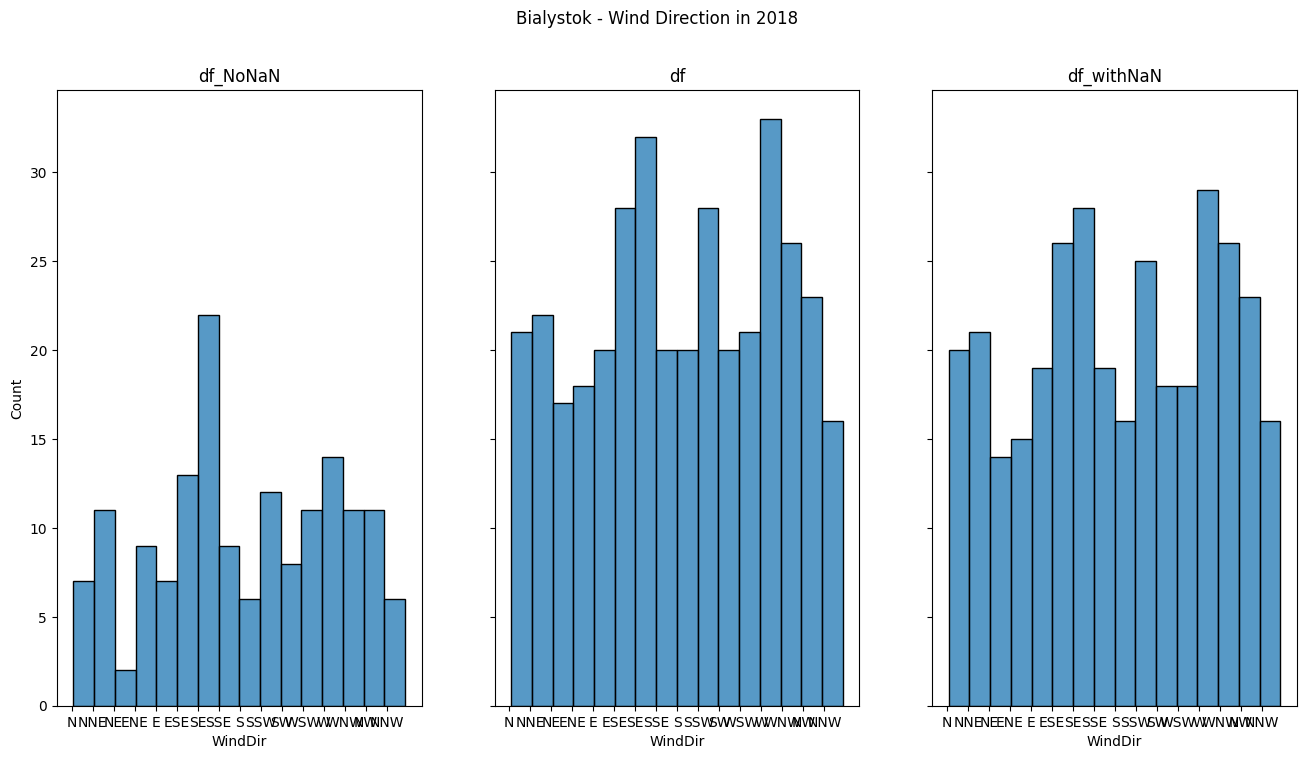

In [270]:
run(df_Podlas)

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from ipywidgets import interact, widgets

# Concatenate all data into a single DataFrame
data = pd.concat([df_Krakow, df_Warsaw, df_Szczec, df_Gdansk, df_Podlas, df_Malmo, df_Monachium, df_Czerniowce, df_Ryga])

data['lon'] = data['City'].map(lambda city: city_coords[city][0])
data['lat'] = data['City'].map(lambda city: city_coords[city][1])

# Function to create a map for the selected date
def plot_temperature(date):
    df = data[data['Date'] == pd.Timestamp(date)]
    
    if df.empty:
        print(f"No data available for {date}")
        return
    
    # Generate a grid for interpolation
    grid_lon, grid_lat = np.mgrid[14:25:10j, 49:55:10j]
    
    # Interpolate the data onto the grid
    grid_temp = griddata((df['lon'], df['lat']), df['TempAvg'], (grid_lon, grid_lat), fill_value=0, method='cubic')
    
    # Create the map
    plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([14, 25, 49, 55], crs=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, edgecolor='black')
    
    # Plot contours with fixed color bar limits and gradient colors
    contour = ax.contourf(grid_lon, grid_lat, grid_temp, 60, transform=ccrs.PlateCarree(), cmap='coolwarm')
    plt.colorbar(contour, ax=ax, orientation='vertical', label='Temperature (°C)')
    
    for cityName in list(city_coords.keys())[:5]:
        ax.text(city_coords[cityName][0], city_coords[cityName][1], cityName, transform=ccrs.PlateCarree(), fontsize=12, verticalalignment='center', color='black', zorder=6)
    
    
    # Add title
    plt.title(f'Temperature Distribution in Poland on {date}')
    
    # Display the map
    plt.show()

# Create a date slider widget
date_slider = widgets.SelectionSlider(
    options=[date.strftime('%Y-%m-%d') for date in pd.date_range(start=f'{year}-01-01', end=f'{year}-12-31')],
    description='Date',
    continuous_update=False
)

# Connect the widget to the function
interact(plot_temperature, date=date_slider)

# plot_temperature(f'{year}-01-01')


interactive(children=(SelectionSlider(continuous_update=False, description='Date', options=('2018-01-01', '201…

<function __main__.plot_temperature(date)>